<a href="https://colab.research.google.com/github/ajay-del-bot/PythonAnalysis/blob/main/CancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%config Completer.use_jedi = False


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
df = pd.read_csv("C:\\Users\\Ajay's PC\\breastCancer.csv")

In [10]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [11]:
df.shape

(699, 11)

# Data PreProcessing

In [12]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

2 is for Benign<BR>
4 is for Malignant

In [13]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [14]:
df['bare_nucleoli'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [15]:
df[df['bare_nucleoli']=='?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [16]:
digits_in_bare_nucleoli = pd.DataFrame(df.bare_nucleoli.str.isdigit())
digits_in_bare_nucleoli

,bare_nucleoli
0,True
1,True
2,True
3,True
4,True
...,...
694,True
695,True
696,True
697,True


In [18]:
df = df.replace('?', np.nan)

In [19]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [20]:
df = df.fillna(df.median())

In [21]:
df['bare_nucleoli'].value_counts()

1      402
10     132
5       30
2       30
3       28
8       21
4       19
1.0     16
9        9
7        8
6        4
Name: bare_nucleoli, dtype: int64

# Exploratory Data Analysis

In [22]:
df.tail()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [23]:
df.drop('id', axis=1, inplace=True)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


### Univariate Data Analysis

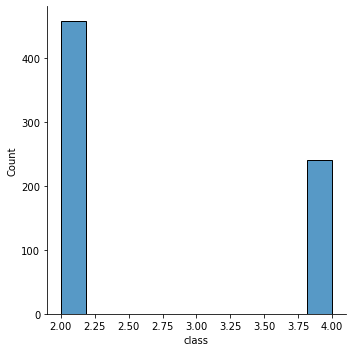

In [27]:
sns.displot(df['class'])

### Multivariate Data Analysis

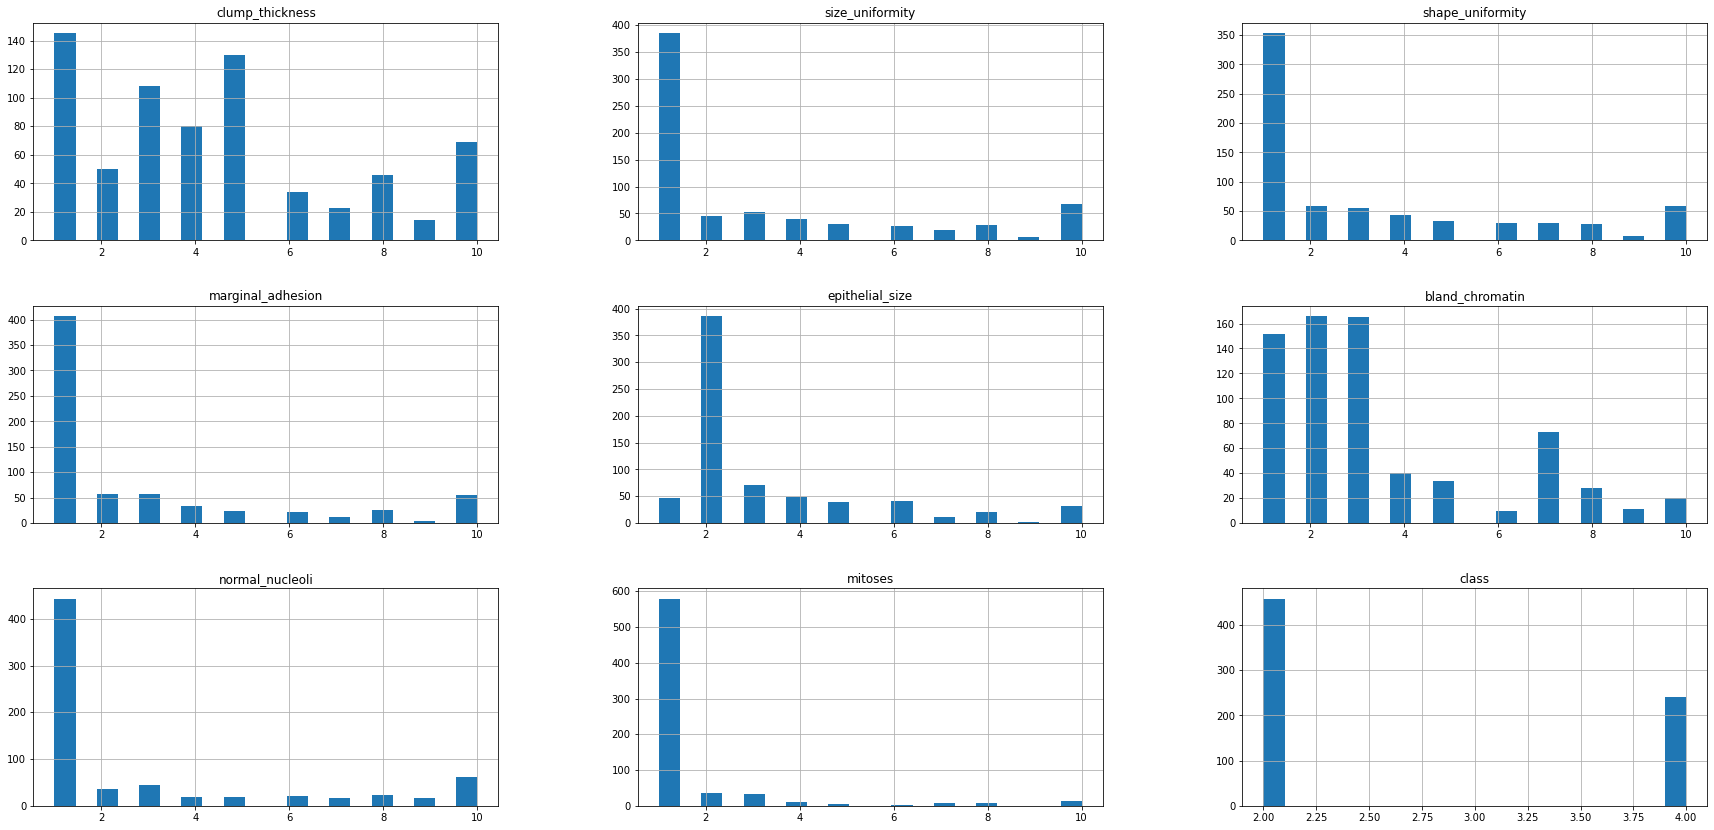

In [28]:
df.hist(bins=20, figsize=(30,30), layout=(6,3));

<AxesSubplot:>

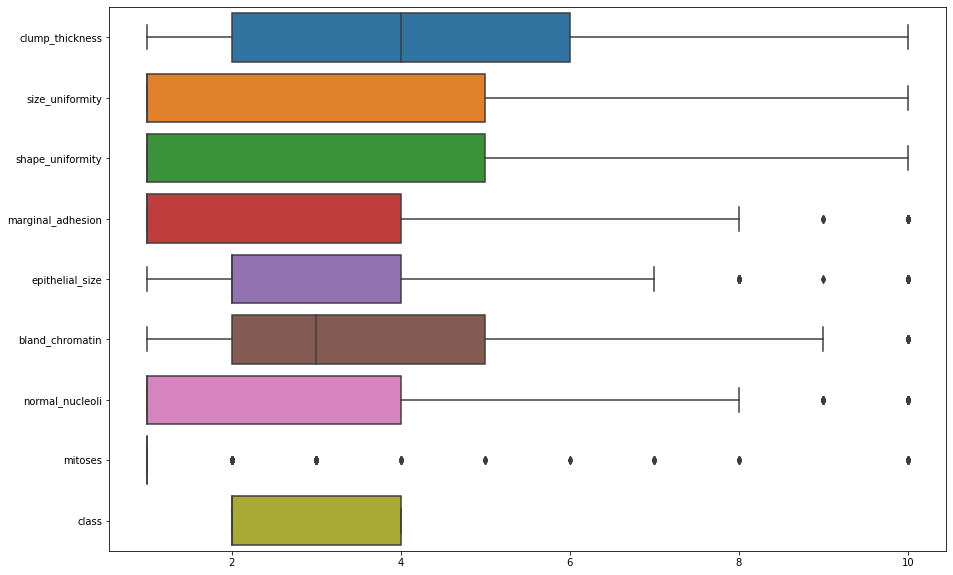

In [29]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')

We can spot the outiers

In [30]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


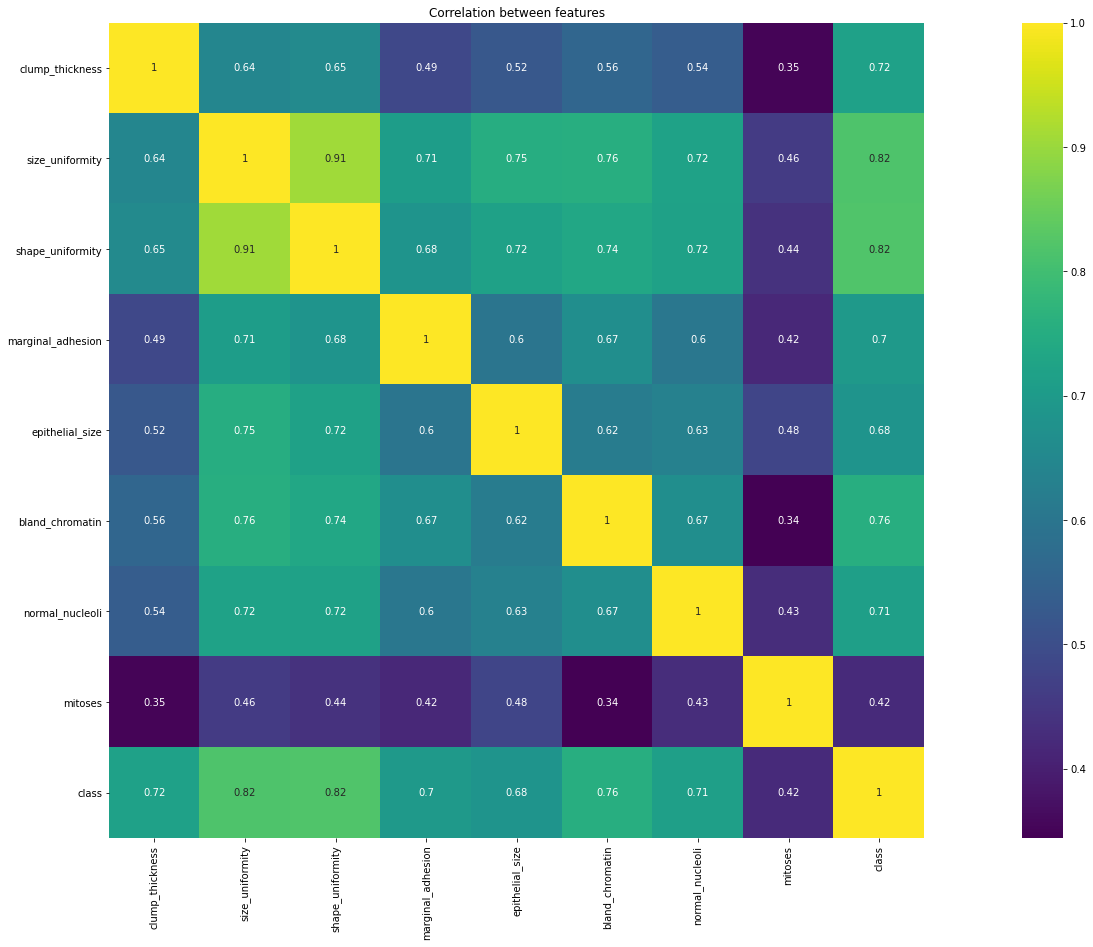

In [31]:
plt.figure(figsize=(35, 15))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between features')
plt.show()

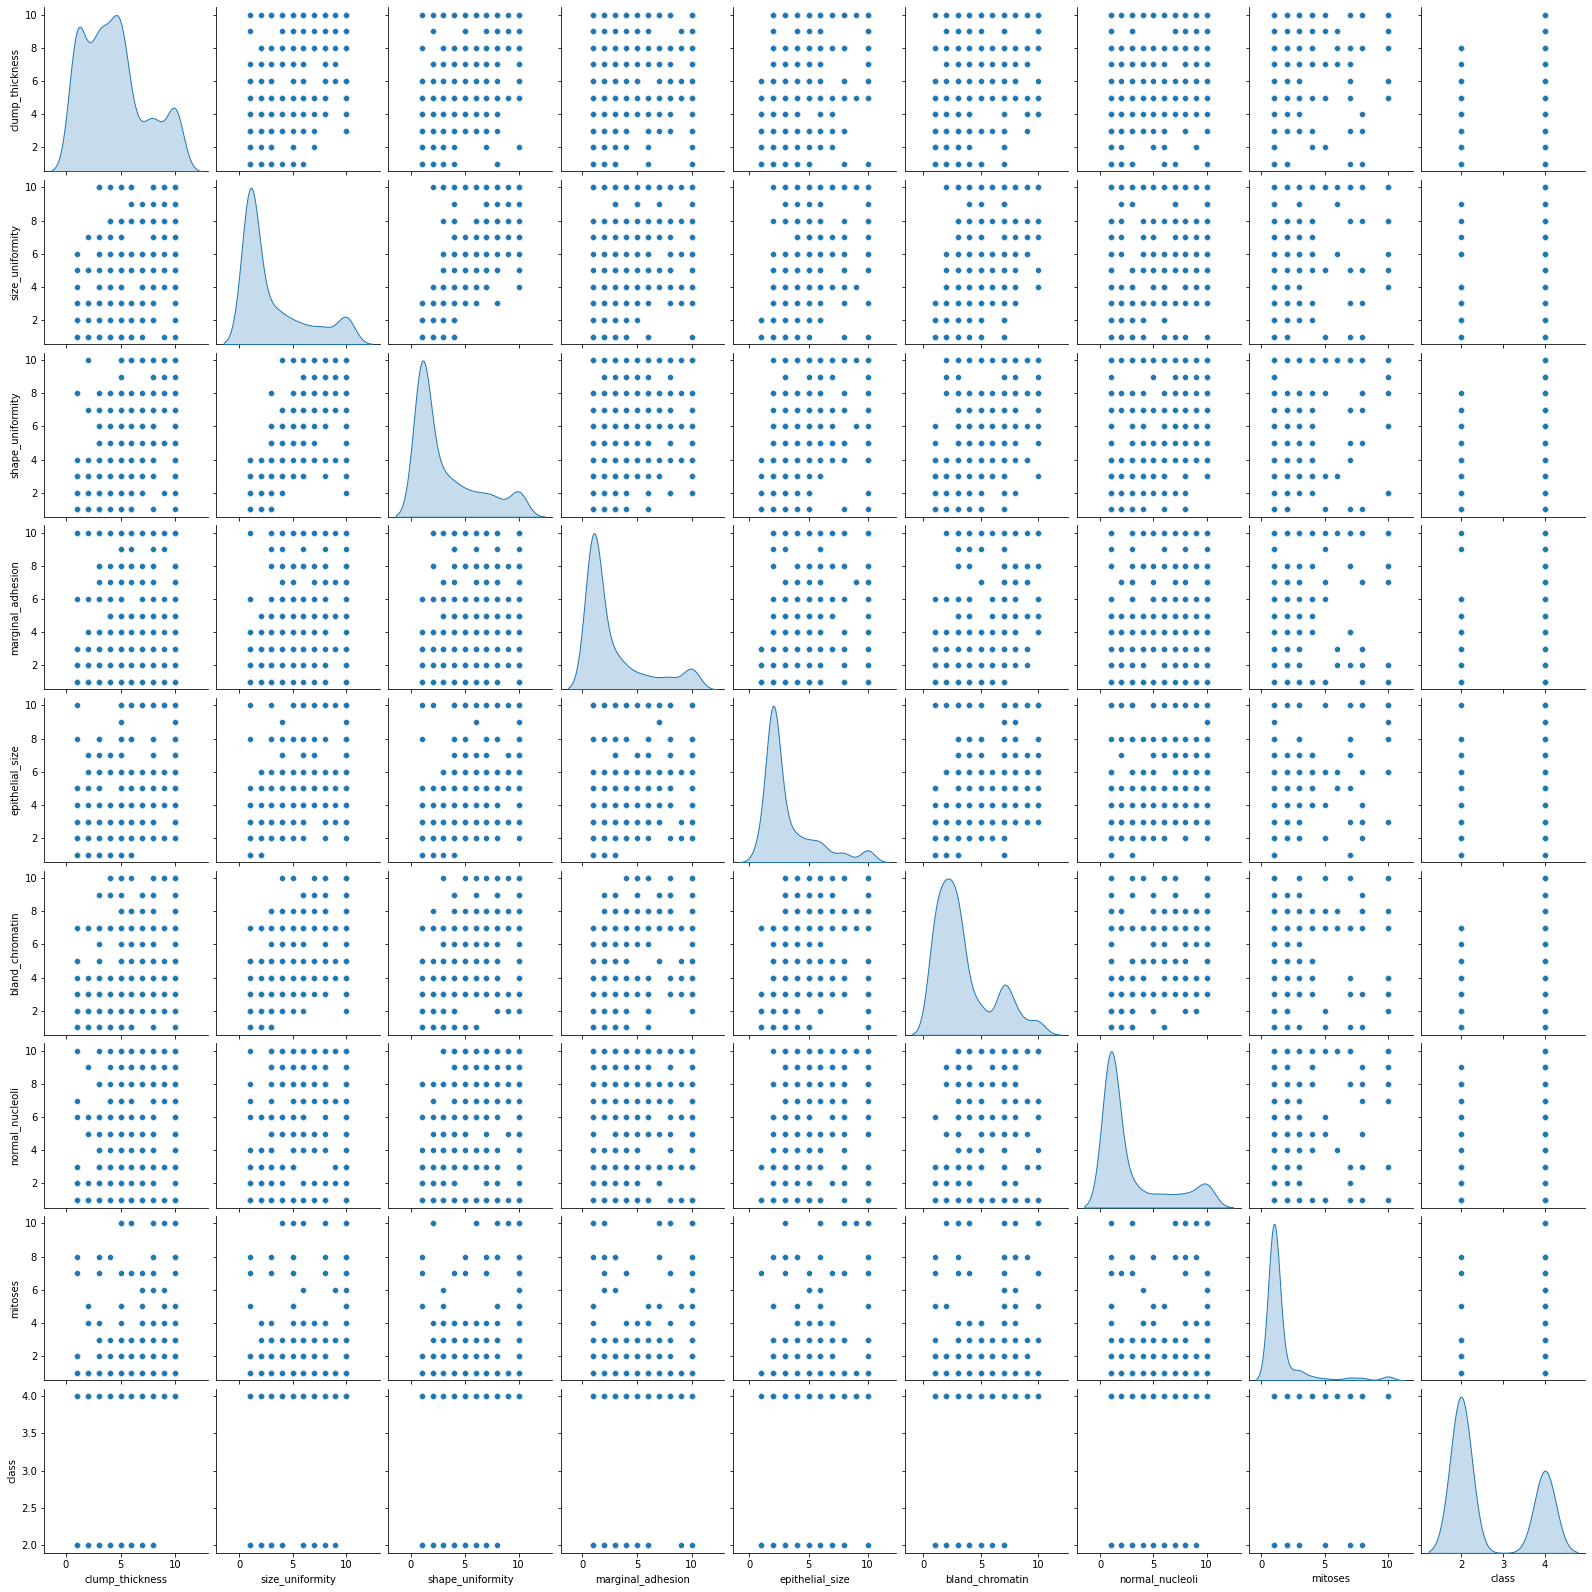

In [32]:
sns.pairplot(df, diag_kind='kde')

# Building Our Model

In [33]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [34]:
X = df.drop('class', axis=1)
Y = df['class']

In [35]:
from sklearn.model_selection import train_test_split
#Split 70:30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## KNeighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [37]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(weights='distance')

In [38]:
KNN_predicted = KNN.predict(X_test)
KNN_predicted

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2], dtype=int64)

In [40]:
Y_test.values

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2], dtype=int64)

In [45]:
from scipy.stats import zscore
print("KNeighborsClassifier prediction score: {0:.4g}%".format(KNN.score(X_test, Y_test)*100))

KNeighborsClassifier prediction score: 97.14%


## Support Vector Machine

In [47]:
from sklearn.svm import SVC
svc = SVC(gamma=0.025, C=3)
svc.fit(X_train, Y_train)

SVC(C=3, gamma=0.025)

In [48]:
SVC_Predicted = svc.predict(X_test)
SVC_Predicted

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2], dtype=int64)

In [49]:
print("SupportVectorMachine prediction score: {0:.4g}%".format(svc.score(X_test, Y_test)*100))

SupportVectorMachine prediction score: 98.1%


In [50]:
knnPredicts = pd.DataFrame(KNN_predicted)
svcPredicts  = pd.DataFrame(SVC_Predicted)

In [52]:
df1 = pd.concat([knnPredicts, svcPredicts], axis=1)
df1.columns = [['KNNPredictions', 'SVCPredictions']]

In [53]:
df1

,KNNPredictions,SVCPredictions
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
205,4,4
206,4,4
207,2,2
208,2,2


In [59]:
from sklearn.metrics import classification_report
print("KNN report:")
print('***'*20)
print(classification_report(Y_test, KNN_predicted))
print('***'*20)

KNN report:
************************************************************
              precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210

************************************************************


In [60]:
print("SVC report:")
print('***'*20)
print(classification_report(Y_test, SVC_Predicted))
print('***'*20)

SVC report:
************************************************************
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210

************************************************************


Confusion Matrix for KNN:


<AxesSubplot:>

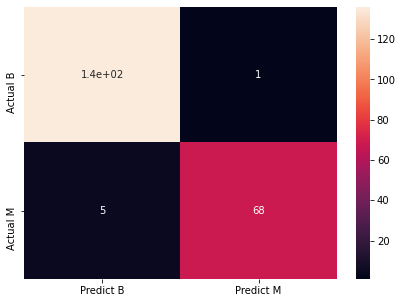

In [65]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix for KNN:")
cm = confusion_matrix(Y_test, KNN_predicted, labels=[2,4])
df_cm = pd.DataFrame(cm, index=[i for i in ['Actual B','Actual M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

Confusion Matrix for SVC:


<AxesSubplot:>

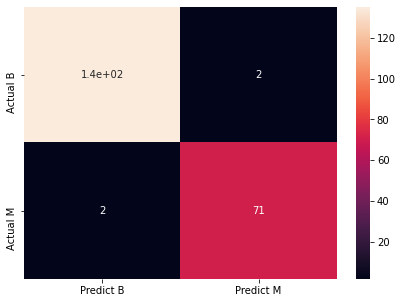

In [64]:
print("Confusion Matrix for SVC:")
cm = confusion_matrix(Y_test, SVC_Predicted, labels=[2,4])
df_cm = pd.DataFrame(cm, index=[i for i in ['Actual B','Actual M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)